<a href="https://colab.research.google.com/github/BrenoJesusFernandes/petrobras-tweets-analysis/blob/main/Analise_de_Sentimento_Tweets_Petrobras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# **Analise de sentimentos utilizando um LLM especializado em textos financeiros (FinBERT)**
---

In [ ]:
#@title **Identificação do Grupo**

#@markdown Integrantes do Grupo, nome completo em orgem alfabética
Aluno1 = '41890590, Breno de Jesus Fernandes' #@param {type:"string"} 
Aluno2 = '31895204, Fernando Goncalves dos Santos' #@param {type:"string"}
Aluno3 = '31725279, Gustavo Businhani da silva' #@param {type:"string"}
Aluno4 = 'None' #@param {type:"string"}
Aluno5 = 'None' #@param {type:"string"}



# **Resumo**

Ultimo a ser feito.

Introducao. Referencial Teorico. Conceitos chaves. Exemplo de aplicacao. Exemplo de codigo. Ideia de projeto. Conclusao.

# **Referencial Teórico**



## **Abordagem Classica**





Uma grande parte da literatura financeira e contábil explorou a utilizacao do processamento de linguagem natural (NLP) para analisar textos financeiros. Porem, a maioria desses estudos dependem de algoritmos de que assumem uma estrutura de **"Bag of Words"**. [1]


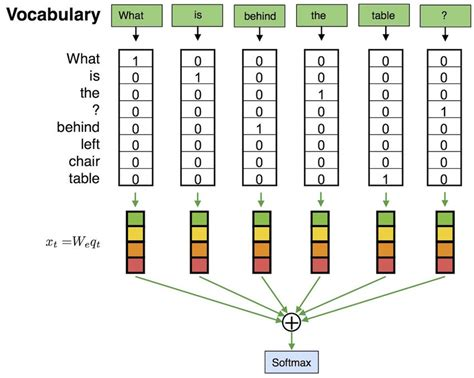

A estrategia de utilizacao da estrutura **"Bag of Words"**, ignora o contexto e analisa o texto como uma coleção de palavras individuais tratadas
independentemente, sem considerar a gramática ou a ordem das palavras. [2]


## **Redes Neurais e Algoritmos de Deep Learning**



Nos últimos anos, pesquisadores de NPL introduziram técnicas baseadas em Redes Neurais e Deep Learning para aprimorar a  analise de textos financeiros. Os algoritmos de deep learning pertencem a uma classe de algoritmos de machine learning chamados de redes neurais. Possuem uma camada de entrada e uma camada de saída conectadas por uma ou mais camadas ocultas.



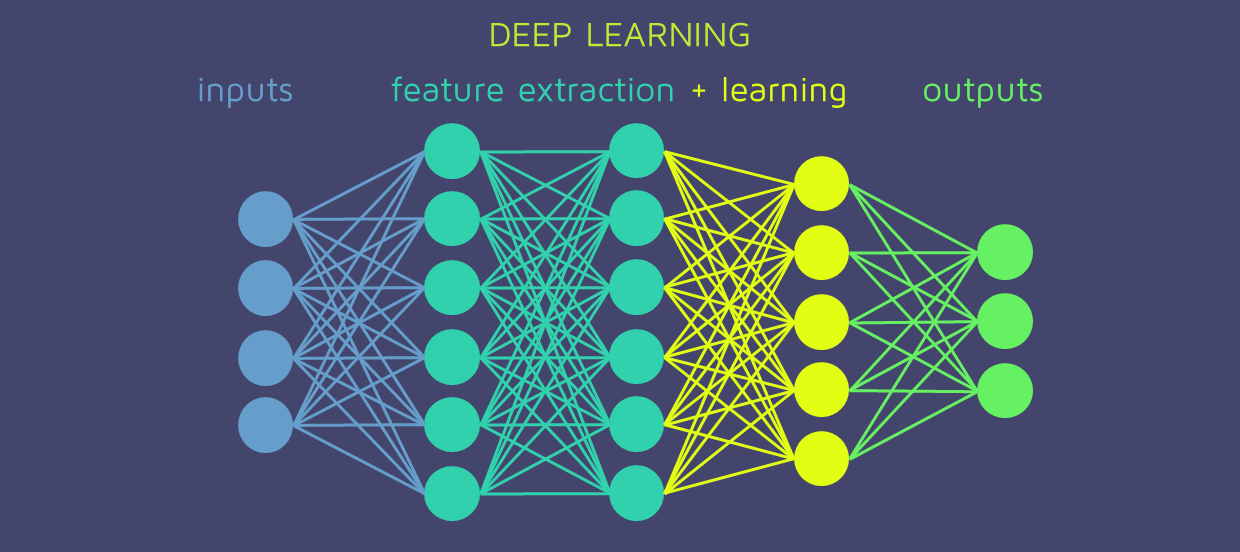

A camada de entrada recebe os dados brutos iniciais (por exemplo, texto em tarefas de NLP) e os envia para as camadas ocultas, que processa os dados usando funções de ativacao não lineares com determinados parâmetros e, em sequencia, alimenta a próxima camada.



A camada de saída obtém dados da última camada oculta e apresenta o resultado da previsão (por exemplo, positivo, neutro ou negativo para classificação de sentimento). 



Os algoritmos de rede neural geralmente especificam uma função não linear e usam dados de treinamento para encontrar parâmetros que minimizam os erros de previsão (ou seja, a diferença entre a previsão da camada de saída e o valor real).



A incorporação de palavras neurais melhora o one-hot encoding de duas maneiras. Primeiro e mais importante, ele aprende as relações entre as palavras de um corpus de forma que seus vetores capturem informações semânticas e sintáticas. Por exemplo, em word2vec, “Japão” e “sushi” estão mais próximos no espaço vetorial do que “Japão” e “pizza” (Mikolov et al. 2013). 

Em segundo lugar, em comparação com a codificação one-hot, que resulta em vetores com dimensões de dezenas de milhares, as incorporações de palavras neurais geralmente produzem vetores muito menores de algumas centenas de dimensões, reduzindo assim o número de parâmetros que os algoritmos de aprendizado de máquina devem estimar e melhorando sua atuação.

## **LLMs (Large language models)** 

Nos últimos anos, os pesquisadores de NPL introduziram os LLMs que
têm embeddings contextualizados (ou seja, eles representam palavras usando diferentes vetores, dependendo do seu contexto). 







Por exemplo, no modelo BERT, a palavra “Dado” tem diferentes vetores de saída para as duas sentenças: “Joguei o dado e tive grande sorte” e “Existe grande qualidade nesse dado”. Os Embeendings contextualizados melhoraram substancialmente a tarefa de NPL na representação de textos. Os ultimos LLMs mais famosos utilizados sao: ELMo, OpenAI GPT, e o modelo BERT.





No entanto, os LLMs também têm várias desvantagens em comparação com as abordagens mais simples. Primeiro, o enorme número de parâmetros pode ser difícil e caro para treinar e utilizar, tambem exige quantidades substanciais de dados textuais, recursos de computação (por exemplo, armazenamento e processadores de alta capacidade, como uma unidade de processamento gráfico [GPU] ou servidores em nuvem), energia
consumo e tempo de treinamento. 



Mesmo os pesquisadores de linguística computacional questionam se
LLMs recentemente desenvolvidos são muito complexos com muito pouca melhoria para justificar seu aumento
custos de implementação (Strubell et al. 2019; Schwartz et al. 2020; Bender et al. 2021).

## **BERTs**

Pesquisadores que desejam usar LLMs para tarefas específicas de NPL
podem ajustar um LLM pré-treinado usando uma amostra de treinamento muito menor (aprendizado supervisionado), Este processo de duas etapas, também conhecido como aprendizado de transferência, pode alcançar alto desempenho sem
incorrendo em custos substanciais de implementação. Nesse contexto surge o
FinBERT.

## **FinBERT**

FinBERT é um modelo de linguagem especializado em artigos financeiros, o estado da arte para classificacao de sentimentos no contexto financeiro com 97% de acuracia [1].




### **Como funciona?**
  
São feitas duas etapas: uma chamada de pré-treinamento, que é a etapa que demanda muito texto e capacidade computacional e o “fine-tunning”, em que são “colados” no BERT as camadas para o uso do modelo para a tarefa e feito o treinamento. Esse treinamento, ao menos em relação ao pré-treinamento, é menos custoso computacionalmente.




Para o treinamento do BERT são utilizadas duas técnicas: MLM (Masked Language Model) e NSP (Next Sentence Prediction). No MLM, o modelo é levado a descobrir qual palavra foi mascarada no texto, já o NSP, visa que o modelo decida se a próxima frase é a sequência da anterior ou não.


### **Funcao de Ativacao**
Alguma coisa

### **Back Propagation**
Alguma coisa

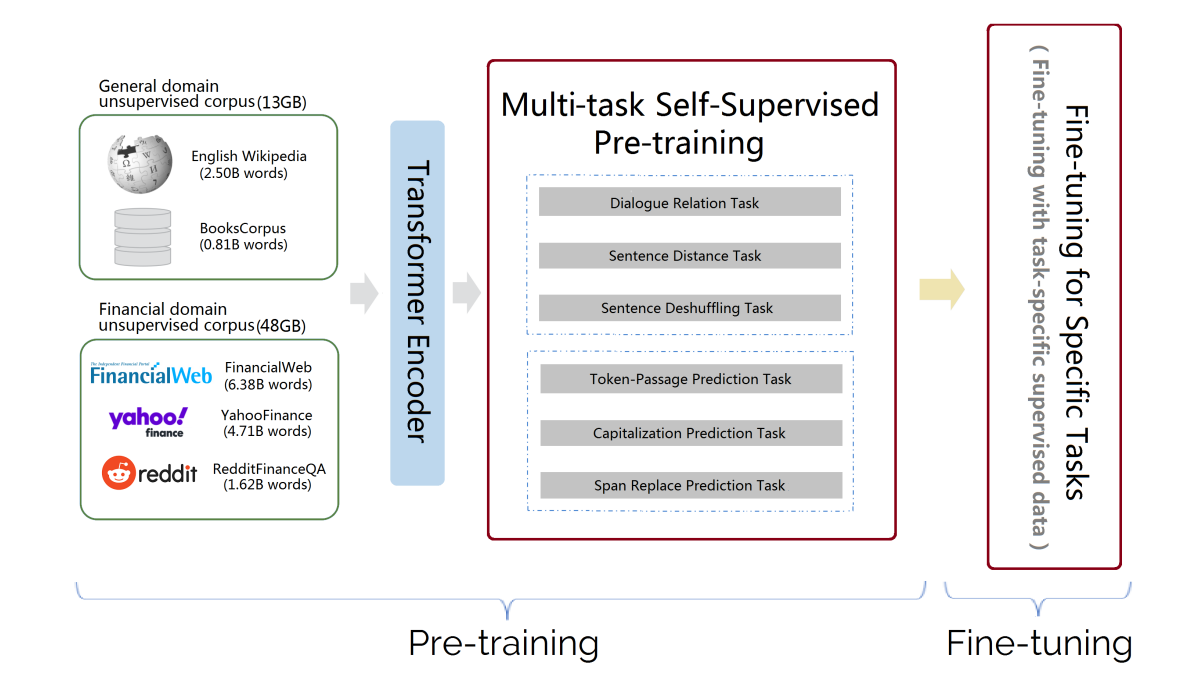

FinBERT aquitetura de pre-treinamento [[1]](#scrollTo=Refer_ncias)

## **Analise de sentimento em tweets com FinBERT**

Citar artigo

## **Idiomas Suportados**

Originalmente o FinBERT foi treinado apenas em textos em inglês, assim como o BERT. No entanto, posteriormente os pesquisadores lançaram versoes treinadas em outros idiomas inclusive no portugues brasileiro, feito pelo grupo de inteligencia artifical da USP (Turing USP) [ [6](#scrollTo=Refer_ncias) ].

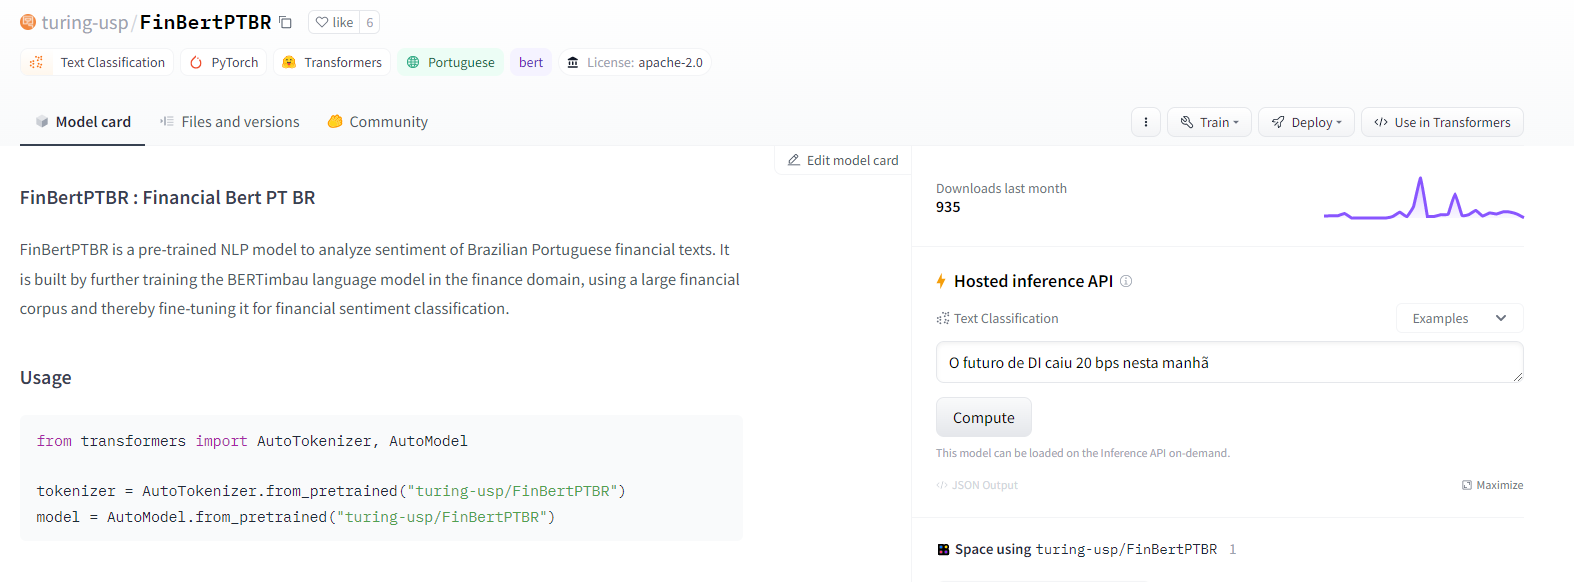

# **Conceitos Chave**





## 1. **Funcao de ativacao**
É uma função, em geral não linear, aplicada à combinação linear das entradas de um neurônio artificial. Exemplos comuns de funções de ativação são a ReLU, Softmax,  e sigmoid.










## 2. **Backpropagation**

É o algoritmo empregado para atualizar e efetura o treinamento dos pesos de uma rede neural. Após o processamento da rede (forward) é empregado o erro entre a saída da rede e a saída desejada para se ajustar os pesos em um processo de retropropagação (no sentido contrário), em que cada camada é ajustada na medida de sua participação no resultado da rede.



## 3. **Analise de sentimento**
A análise de sentimentos é uma mineração contextual de um texto que identifica e extrai informações subjetivas no material de origem. Ela ajuda as empresas a entenderem o sentimento social de sua marca, produto ou serviço.



## 4. **LLMs**
São modelos de linguagem com redes neurais treinadas em muitos dados. Eles têm a capacidade de gerar texto muito mais fluente e coerente do que os modelos de linguagem anteriores e também podem ser usados como uma base sólida para outras tarefas de Processamento de Linguagem Natural.




## 5. **FinBERT**
E um LLM adaptado ao domínio financeiro baseado no algoritmo BERT do Google

# **Exemplo de Aplicação**


Realizar analise de sentimentos de tweets da petrobras com FinBERT

# **Exemplo de Código**

## Instalacao de dependencias

In [ ]:
!pip install transformers

## Configuracao do pytorch para apresentacao de resultados deterministicos

In [ ]:
import random
import os
import numpy as np
import torch

master_seed = 1984

random.seed(master_seed)
os.environ['PYTHONHASHSEED'] = str(master_seed)
np.random.seed(master_seed)
torch.manual_seed(master_seed)
torch.cuda.manual_seed(master_seed)
torch.backends.cudnn.deterministic = True

## Configuracao do uso da GPU (⚠️ Habilite a GPU no COLAB )

In [ ]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Dispositivo utilizado: {device} \n')

if device.type == 'cuda':
    print(f'{torch.cuda.get_device_name(0)} \n'
          f'Memoria Alocada: {round(torch.cuda.memory_allocated(0)/1024**2, 1)} MB \n'
          f'Memoria em Cache: {round(torch.cuda.memory_reserved(0)/1024**2, 1)} MB')

## Exemplo de analise de sentimento com FinBERT

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# Download e inicializacao do modelo pre treinado na gpu
finbert_model = BertForSequenceClassification.from_pretrained('turing-usp/FinBertPTBR').to(device)
tokenizer = BertTokenizer.from_pretrained('turing-usp/FinBertPTBR')

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
petro_tweets_link = 'https://raw.githubusercontent.com/BrenoJesusFernandes/petrobras-tweets-analysis/main/petrobras-tweets.csv'
petro_tweets_df = pd.read_csv(petro_tweets_link, parse_dates=['posted_time'])
petro_tweets_df['year_month'] = petro_tweets_df['posted_time'].dt.strftime('%Y%m').astype(int)

In [ ]:
petro_tweets_df.isna().sum()

In [ ]:
# Apenas tweets em portugues que nao sao retweets
petro_tweets_df = petro_tweets_df[petro_tweets_df['content original language'].str.contains('pt') & ~petro_tweets_df['is_retweet']]
month_dist = petro_tweets_df.groupby(by='year_month', as_index=False).size()
month_dist.head()


In [ ]:
month_dist_plt = month_dist.plot.bar(y='size', x='year_month', figsize=(25, 5))

In [ ]:
petro_tweets_df =  petro_tweets_df[['content', 'year_month']]

In [ ]:
# Classificador de sentencas utilizando o modelo finbert pt-br e acelaracao de GPU
classifier = pipeline("sentiment-analysis",
                      model=finbert_model,
                      tokenizer=tokenizer,
                      #device=0
                      )

# Classificacao das sentencas
classified_sentences = classifier(petro_tweets_df['content'].tolist())

# Organizacao da classificacao e sentencas em um dataframe
classified_sentences_df = pd.DataFrame(classified_sentences)
classified_sentences_df['sentence'] = petro_tweets_df['content'].tolist()
classified_sentences_df['year_month'] = petro_tweets_df['year_month'].tolist()

classified_sentences_df

In [ ]:

classified_sentences_df['label'].describe()

In [ ]:
def label_to_num(label: str) -> int:
  if label == 'NEGATIVE':
    return 0
  elif label == 'NEUTRAL':
    return 1

  return 2

In [ ]:
classified_sentences_df['num label'] = classified_sentences_df['label'].apply(lambda valor: label_to_num(valor))

In [ ]:
month_df = classified_sentences_df.groupby(by=['year_month'], as_index=False)['num label'].mean()
month_df['num label'] = month_df['num label'] / 2
month_df

In [ ]:
petr4_link = 'https://raw.githubusercontent.com/BrenoJesusFernandes/petrobras-tweets-analysis/main/PETR4%20Historical%20Data%20-%20Monthly.csv'
petr4_df = pd.read_csv(petr4_link, parse_dates=['Date'])
petr4_df['year_month'] = petr4_df['Date'].dt.strftime('%Y%m').astype(int)
petr4_df = petr4_df[['year_month', 'Close (R$)']]
petr4_df

In [ ]:
final = pd.merge(month_df, petr4_df, left_on='year_month', right_on='year_month')

In [ ]:
final.info()

In [ ]:
final

In [ ]:
ano_mes = 201801
final.loc[final['year_month'] > ano_mes, 'num label'].corr(final.loc[final['year_month'] > ano_mes, 'Close (R$)'], )

In [ ]:
final.corr()

In [ ]:
final['norm close'] = final['Close (R$)'] / final['Close (R$)'].max()


In [ ]:
final.plot.line(x='year_month', y=['num label','norm close'])

In [ ]:
final.plot.scatter(x='num label', y='norm close')

In [ ]:
final.corr()

## Exemplo de teste de correlacao entre sentimento e preco

In [ ]:
final['Clo']

In [ ]:
classified_sentences_df.corr()

# **Uma ideia de Projeto de Aplicação**



1 - Adquirir tweets que falam sobre a petrobras.

2 - Realizar analise de sentimento nos tweets com FinBERT.

3 - Testar correlacao entre o preco da acao e o sentimento. 

4 - Caso possua uma boa correlacao, estudar essa nova feature para utilizar em futuros trabalhos para predicoes de precos da acao da petrobras.


# **Referências**



[1] HUANG, A.; WANG, H.; YANG, Y. FinBERT—A deep learning approach to extracting textual information. SSRN Electronic Journal, 2020.



[2] ZOU, Y.; HERREMANS, D. A multimodal model with Twitter FinBERT embeddings for extreme price movement prediction of Bitcoin. 2022. Disponível em: <http://arxiv.org/abs/2206.00648>.



[3] PENG, B. et al. Is domain adaptation worth your investment? Comparing BERT and FinBERT on financial tasks. Proceedings of the Third Workshop on Economics and Natural Language Processing. Anais...Stroudsburg, PA, USA: Association for Computational Linguistics, 2021.



[4] JAHAN, M. S.; OUSSALAH, M.; ARHAB, N. Finnish hate-speech detection on social media using CNN and FinBERT. Proceedings of the Thirteenth Language Resources and Evaluation Conference. Anais...Marseille, France: European Language Resources Association, 2022.



[5] CHENG, W.; CHEN, S. Sentiment analysis of financial texts based on attention mechanism of FinBERT and BiLSTM. 2021 International Conference on Computer Engineering and Application (ICCEA). Anais...IEEE, 2021.



[6] FinBERT PT-BR. Hugging Face. Disponível em: <https://huggingface.co/turing-usp/FinBertPTBR>. Acesso em: 11 nov. 2022.



[7] SIDOGI, T.; MBUVHA, R.; MARWALA, T. Stock price prediction using sentiment analysis. 2021 IEEE International Conference on Systems, Man, and Cybernetics (SMC). Anais...IEEE, 2021.

# **Vídeo, GitHub e Publicação**

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('uj4hm7Lr2Wo')

# **Conclusão** 




Conclusao de algo

# **Avaliacao**

In [ ]:

Referencial_Teorico = 10 #@param {type:"slider", min:0, max:10, step:1}

Conceitos_Chave = 10 #@param {type:"slider", min:0, max:10, step:1}

Exemplo_Aplicacao = 10 #@param {type:"slider", min:0, max:10, step:1}

Ideia_Projeto = 10 #@param {type:"slider", min:0, max:10, step:1}

Conclusao = 10 #@param {type:"slider", min:0, max:10, step:1}








# **Nota**

In [ ]:
 #@title 
nota = Referencial_Teorico + Conceitos_Chave + 2*Exemplo_Aplicacao + 2*Ideia_Projeto + Conclusao

nota = nota / 7

print(f'Nota final do trabalho {nota :.1f}')

import numpy as np
import pandas as pd

alunos = pd.DataFrame()
lista_tia = []
lista_nome = []

for i in range(1,6):
  exec("if Aluno" + str(i) + " !='None':  lista = Aluno" + str(i) + ".split(','); lista_tia.append(lista[0]); lista_nome.append(lista[1].upper())")

alunos['tia'] = lista_tia
alunos['nome'] = lista_nome
alunos['nota'] = np.round(nota,1)
print()
display(alunos)